In [1]:
import pandas as pd 
df=pd.read_csv("death-rates-from-air-pollution.csv")
print(df)

           Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6463     Zimbabwe  ZWE  2013   
6464     Zimbabwe  ZWE  2014   
6465     Zimbabwe  ZWE  2015   
6466     Zimbabwe  ZWE  2016   
6467     Zimbabwe  ZWE  2017   

      Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)  \
0                                            299.477309                   
1                                            291.277967                   
2                                            278.963056                   
3                                            278.790815                   
4                                            287.162923                   
...                                                 ...                   
6463                                         143.850145                   
6464           

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 7 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Entity                                                                                        6468 non-null   object 
 1   Code                                                                                          5488 non-null   object 
 2   Year                                                                                          6468 non-null   int64  
 3   Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)                             6468 non-null   float64
 4   Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)  6468 non-null   float64
 5   Deaths - Ambient particulate

In [3]:
df.describe()

,Year,Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate),Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate),Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate),Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,87.804083,50.481504,35.114982,3.370793
std,8.078372,57.845436,58.722565,18.207369,4.325445
min,1990.000000,8.401696,0.003859,7.542899,0.000000
25%,1996.750000,41.016114,2.002779,21.955108,1.302905
50%,2003.500000,72.653557,23.737851,30.977196,2.338684
75%,2010.250000,127.607177,90.138777,44.604181,3.515409
max,2017.000000,318.463253,293.509187,132.815726,37.356034


In [4]:
df.isnull().sum()

Entity                                                                                            0
Code                                                                                            980
Year                                                                                              0
Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)                                 0
Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)      0
Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)          0
Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)                       0
dtype: int64

In [5]:
duplicates=df.duplicated().sum()
df=df.drop_duplicates()

In [6]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)',
       'Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)',
       'Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)',
       'Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)'],
      dtype='object')

In [7]:
num_cols = [
    'Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)',
    'Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)',
    'Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)',
    'Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)'
]

df_num = df[num_cols]


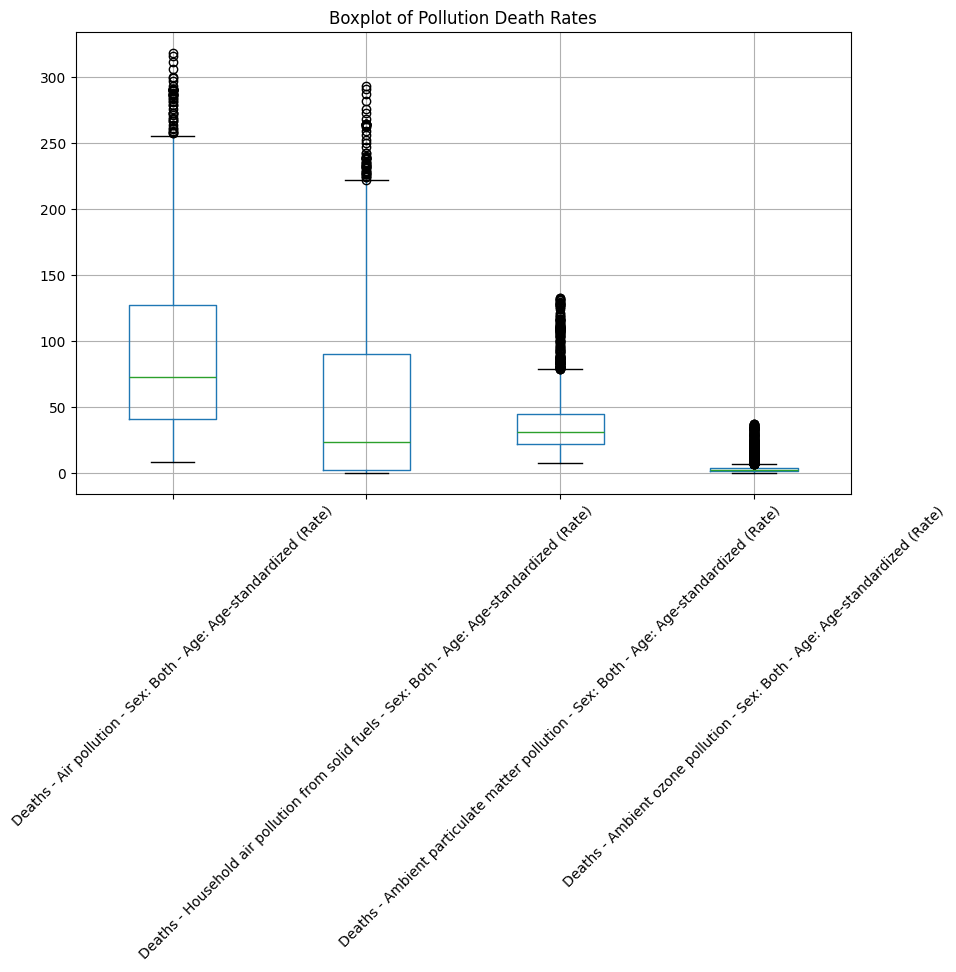

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df_num.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Pollution Death Rates")
plt.show()


In [9]:
df_recent = df[df["Year"] >= 2000]
india_data = df[df["Entity"] == "India"]


In [10]:
import pandas as pd
# Check dataset shape
print("Shape of dataset:", df.shape)

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic statistics
print("\nSummary statistics:")
print(df.describe())


Shape of dataset: (6468, 7)

Missing values per column:
Entity                                                                                            0
Code                                                                                            980
Year                                                                                              0
Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)                                 0
Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)      0
Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)          0
Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)                       0
dtype: int64

Summary statistics:
              Year  \
count  6468.000000   
mean   2003.500000   
std       8.078372   
min    1990.000000   
25%    1996.750000   
50%    2003.500000   
75%    2010.250000   
max    2017.000000   

       Deat

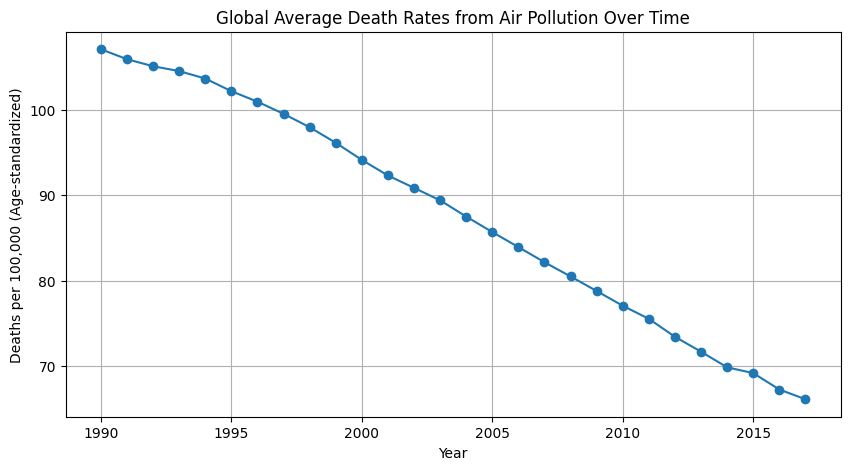

In [11]:
import matplotlib.pyplot as plt

# Global average death rates over time
global_trend = df.groupby("Year")[
    "Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)"
].mean()

plt.figure(figsize=(10,5))
plt.plot(global_trend.index, global_trend.values, marker='o')
plt.title("Global Average Death Rates from Air Pollution Over Time")
plt.xlabel("Year")
plt.ylabel("Deaths per 100,000 (Age-standardized)")
plt.grid(True)
plt.show()


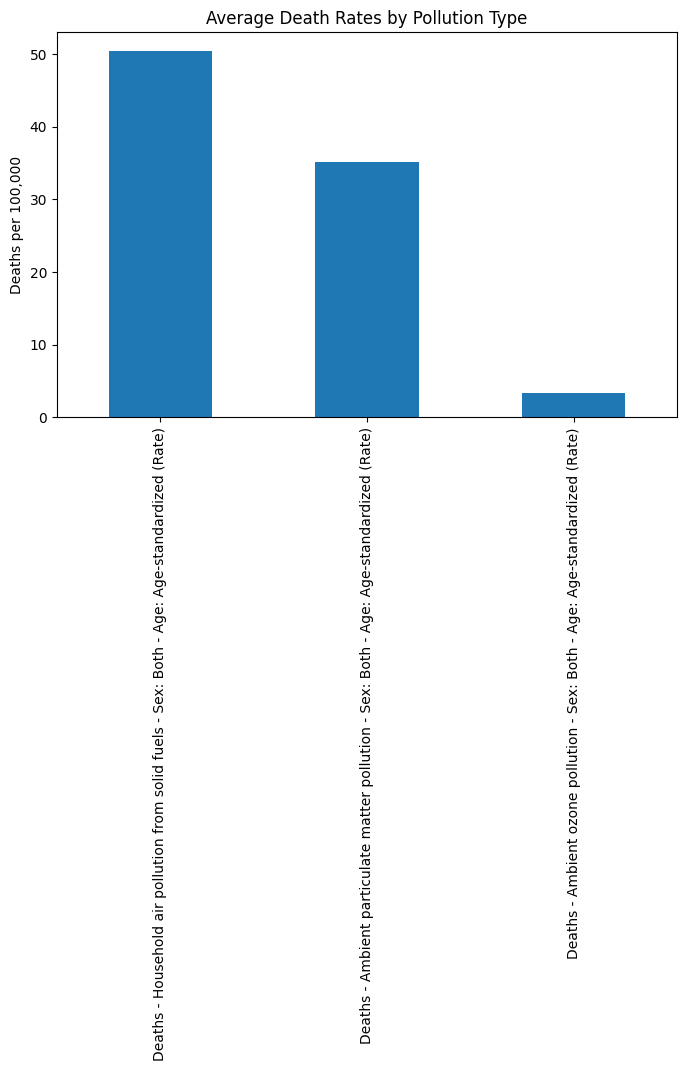

In [12]:
# Average of each type over all years & countries
pollution_types = df[[
    "Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)",
    "Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)",
    "Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)"
]].mean()

pollution_types.plot(kind='bar', figsize=(8,5))
plt.title("Average Death Rates by Pollution Type")
plt.ylabel("Deaths per 100,000")
plt.show()


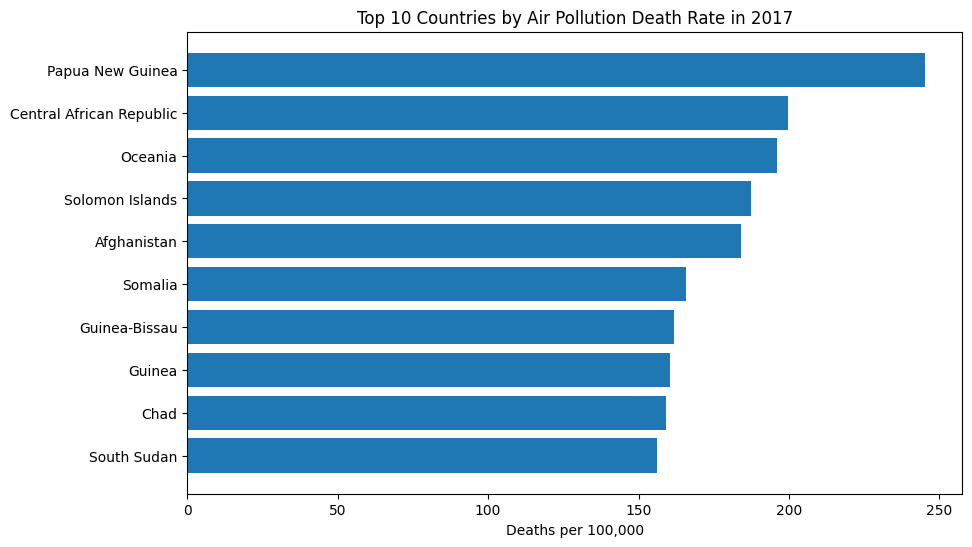

In [13]:
# Latest year available
latest_year = df["Year"].max()
latest_data = df[df["Year"] == latest_year]

# Top 10 countries
top_countries = latest_data.nlargest(
    10, "Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)"
)

plt.figure(figsize=(10,6))
plt.barh(top_countries["Entity"], 
         top_countries["Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)"])
plt.title(f"Top 10 Countries by Air Pollution Death Rate in {latest_year}")
plt.xlabel("Deaths per 100,000")
plt.gca().invert_yaxis()
plt.show()


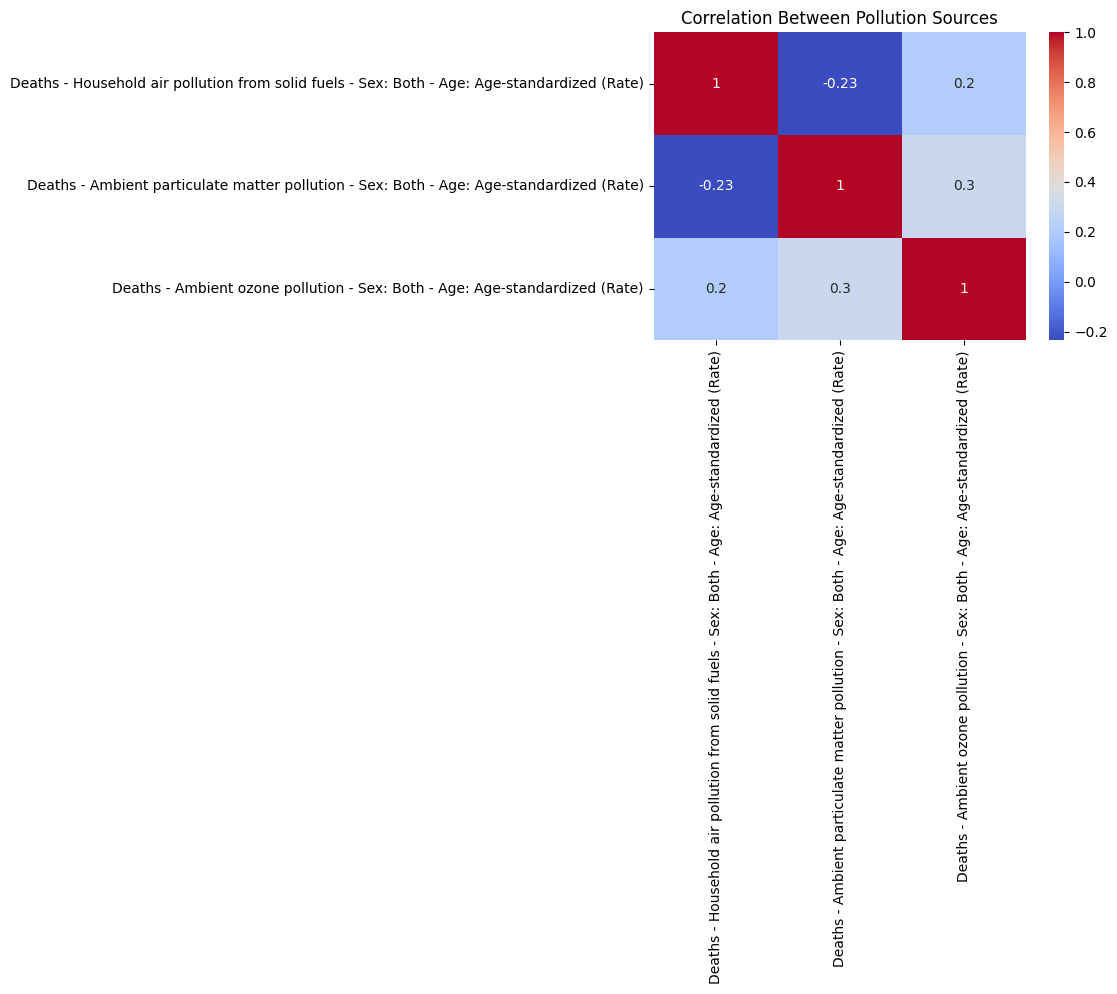

In [14]:
import seaborn as sns

corr = df[[
    "Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)",
    "Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)",
    "Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)"
]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollution Sources")
plt.show()
